In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook
%matplotlib notebook
# Parameters taken from http://www.aliensaint.com/uo/java/rd/
# -----------------------------------------------------
# Du, Dv, F, k = 0.14, 0.06, 0.035, 0.065  # Bacteria 2
# Du, Dv, F, k = 0.16, 0.08, 0.060, 0.062  # Coral
# Du, Dv, F, k = 0.19, 0.05, 0.060, 0.062  # Fingerprint
# Du, Dv, F, k = 0.10, 0.10, 0.018, 0.050  # Spirals
# Du, Dv, F, k = 0.12, 0.08, 0.020, 0.050  # Spirals Dense
# Du, Dv, F, k = 0.10, 0.16, 0.020, 0.050  # Spirals Fast
# Du, Dv, F, k = 0.16, 0.08, 0.020, 0.055  # Unstable
# Du, Dv, F, k = 0.16, 0.08, 0.050, 0.065  # Worms 1
# Du, Dv, F, k = 0.16, 0.08, 0.054, 0.063  # Worms 2
# Du, Dv, F, k = 0.16, 0.08, 0.035, 0.060  # Zebrafish

Du, Dv, F, k = 0.14, 0.06, 0.035, 0.065  # Bacteria 2
n = 256


U = np.zeros((n+2, n+2), dtype=np.double)
V = np.zeros((n+2, n+2), dtype=np.double)

u, v = U[1:-1, 1:-1], V[1:-1, 1:-1]

r = 20
u[:] = 1.0

U[n//2-r:n//2+r, n//2-r:n//2+r] = 0.50
V[n//2-r:n//2+r, n//2-r:n//2+r] = 0.25

u += 0.05*np.random.uniform(-1, +1, (n, n))

v += 0.05*np.random.uniform(-1, +1, (n, n))


def update(frame):
    
    global U, V, u, v, im

    for i in range(10):
        Lu = (                  U[0:-2, 1:-1] +
              U[1:-1, 0:-2] - 4*U[1:-1, 1:-1] + U[1:-1, 2:] +
                                U[2:  , 1:-1])
        Lv = (                  V[0:-2, 1:-1] +
              V[1:-1, 0:-2] - 4*V[1:-1, 1:-1] + V[1:-1, 2:] +
                                V[2:  , 1:-1])
        uvv = u*v*v
        u += (Du*Lu - uvv + F*(1-u))
        v += (Dv*Lv + uvv - (F+k)*v)

    im.set_data(V)
    im.set_clim(vmin=V.min(), vmax=V.max())

<IPython.core.display.Javascript object>


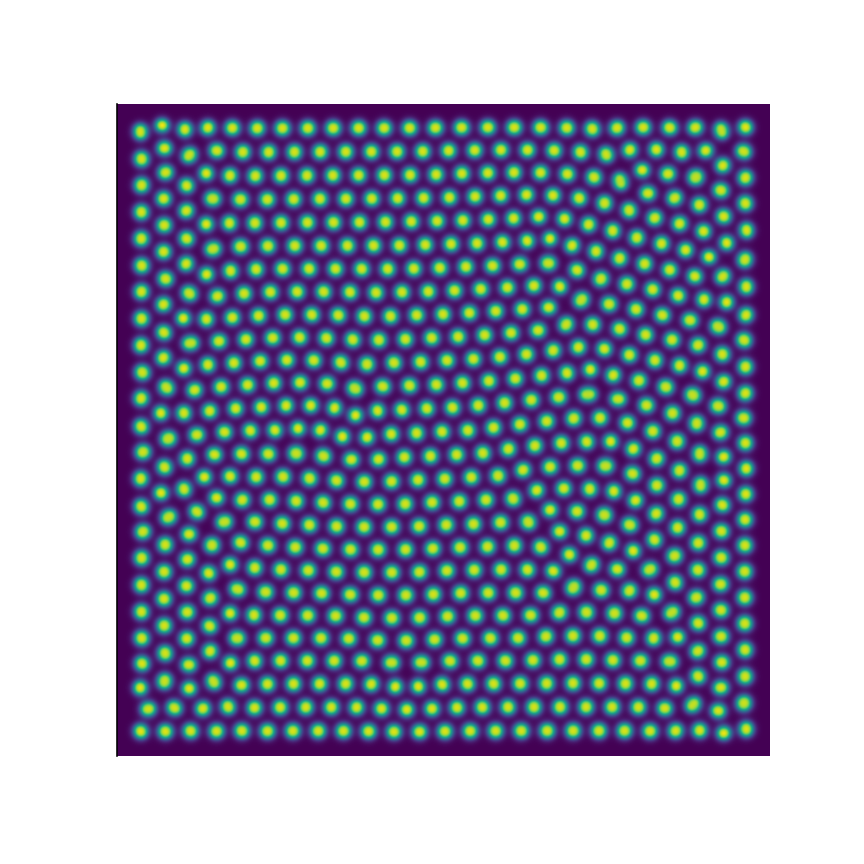

In [47]:
fig = plt.figure(figsize=(6, 6))


im = plt.imshow(V, interpolation='bicubic', cmap=plt.cm.viridis)

plt.xticks([]), plt.yticks([])

animation = FuncAnimation(fig, update, interval=10, frames=2000)


### Object oriented code

In [10]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags 


class GrayScott():
    """Class to solve Gray-Scott Reaction-Diffusion equation"""
    def __init__(self, N):
        self.N = N
        self.u = np.ones((N, N), dtype=np.float128)
        self.v = np.zeros((N, N), dtype=np.float128)
    
    
    def laplacian(self):
        """Construct a sparse matrix that applies the 5-point discretization"""
        N = self.N
        e=np.ones(N**2)
        e2=([1]*(N-1)+[0])*N
        e3=([0]+[1]*(N-1))*N
        A=spdiags([-4*e,e2,e3,e,e],[0,-1,1,-N,N],N**2,N**2)
        return A


    def initialise(self):
        """Setting up the initial condition"""
        N, N2, r = self.N, np.int(self.N/2), 16
        
        self.u += 0.02*np.random.random((N,N))
        self.v += 0.02*np.random.random((N,N))
        
        self.u[N2-r:N2+r, N2-r:N2+r] = 0.50
        self.v[N2-r:N2+r, N2-r:N2+r] = 0.25
        return  

    
    def integrate(self, Nt, Du, Dv, F, K, L):
        """Integrate the resulting system of equations using the Euler method"""
        u = self.u.reshape((N*N))
        v = self.v.reshape((N*N))

        #evolve in time using Euler method
        for i in range(Nt):
            uvv = u*v*v
            u += (Du*L.dot(u) - uvv +  F *(1-u))
            v += (Dv*L.dot(v) + uvv - (F+K)*v  )
        
        self.u = u
        self.v = v
        return
        
    
    def configPlot(self):
        """Plotting business"""
        u = self.u
        v = self.v
        f = plt.figure(figsize=(25, 10), dpi=400, facecolor='w', edgecolor='k');
        sp =  f.add_subplot(1, 2, 1 );
        plt.pcolor(u.reshape((N, N)), cmap=plt.cm.RdBu)
        plt.axis('tight')

        sp =  f.add_subplot(1, 2, 2 );
        plt.pcolor(v.reshape((N, N)), cmap=plt.cm.RdBu)
        plt.axis('tight')
        plt.show()